# Trexquant Interview Project (The Hangman Game)

* Copyright Trexquant Investment LP. All Rights Reserved. 
* Redistribution of this question without written consent from Trexquant is prohibited

## Instruction:
For this coding test, your mission is to write an algorithm that plays the game of Hangman through our API server. 

When a user plays Hangman, the server first selects a secret word at random from a list. The server then returns a row of underscores (space separated)—one for each letter in the secret word—and asks the user to guess a letter. If the user guesses a letter that is in the word, the word is redisplayed with all instances of that letter shown in the correct positions, along with any letters correctly guessed on previous turns. If the letter does not appear in the word, the user is charged with an incorrect guess. The user keeps guessing letters until either (1) the user has correctly guessed all the letters in the word
or (2) the user has made six incorrect guesses.

You are required to write a "guess" function that takes current word (with underscores) as input and returns a guess letter. You will use the API codes below to play 1,000 Hangman games. You have the opportunity to practice before you want to start recording your game results.

Your algorithm is permitted to use a training set of approximately 250,000 dictionary words. Your algorithm will be tested on an entirely disjoint set of 250,000 dictionary words. Please note that this means the words that you will ultimately be tested on do NOT appear in the dictionary that you are given. You are not permitted to use any dictionary other than the training dictionary we provided. This requirement will be strictly enforced by code review.

You are provided with a basic, working algorithm. This algorithm will match the provided masked string (e.g. a _ _ l e) to all possible words in the dictionary, tabulate the frequency of letters appearing in these possible words, and then guess the letter with the highest frequency of appearence that has not already been guessed. If there are no remaining words that match then it will default back to the character frequency distribution of the entire dictionary.

This benchmark strategy is successful approximately 18% of the time. Your task is to design an algorithm that significantly outperforms this benchmark.

In [1]:
import json
import requests
import random
import string
import secrets
import time
import re
import collections
import pandas as pd
import numpy as np
#import tensorflow as tf
#from keras.models import Model, load_model

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import string
import random
try:
    from urllib.parse import parse_qs, urlencode, urlparse
except ImportError:
    from urlparse import parse_qs, urlparse
    from urllib import urlencode

from requests.packages.urllib3.exceptions import InsecureRequestWarning

requests.packages.urllib3.disable_warnings(InsecureRequestWarning)

In [6]:
wordlist = pd.read_table('words_250000_train.txt',header=None)

In [7]:
wordlist.columns = ['word']


In [8]:
wordlist['word'].index

RangeIndex(start=0, stop=227300, step=1)

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
device

device(type='cpu')

In [9]:
collections.Counter('apple')

Counter({'p': 2, 'a': 1, 'l': 1, 'e': 1})

In [10]:
ord('a')

97

In [11]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [12]:

state_value = [0]*26
action_prob = [1/26]*26
input_var = 26
output_var = 26
episodes = 100
default_trials = 6
batch_size = 200
mem = collections.deque(maxlen=2000)
min_size = 500
target_net_update = 20
epsilon = 1.0
epsilon_min = 0.01
epsilon_decay = 0.99
gamma = 0.99

global policy_net


Class DQN(nn.Module):
        def __init__(self,n_observations,n_actions):
                super(DQN,self).__init__()
                self.layer1 = nn.Linear(n_observation,32)
                self.layer2 = nn.Linear(32,n_actions)

        def forward(self,x):
                x=F.relu(self.layer1(x))
                return self.layer2(x)
                

def nn_model(input_shape,action_space):
        input1 = tf.keras.Input(shape=(input_shape,))
        x1 = tf.keras.layers.Dense(32, activation='relu')(input1)
        #x2 = tf.keras.layers.Dense(256, activation='relu')(x1)
        x3 = tf.keras.layers.Dense(action_space, activation='softmax')(x1)
        model = tf.keras.Model(inputs=input1, outputs=x3)
        sgd=tf.keras.optimizers.legacy.SGD(learning_rate=0.01, momentum=0.9)
        model.compile(optimizer=sgd, loss='mse')
        return model

policy_net =DQN(input_var,output_var).to(device)
target_net = nn_model(input_var,output_var)
target_net.set_weights(policy_net.get_weights())

#print(policy_net.summary())
#print(target_net.summary())



In [13]:
a=random.sample(range(0,227300),episodes)
wordlist1=[wordlist['word'][i] for i in a]

In [14]:
print(policy_net.predict([[0]*26]))

1/1 [==============================] - 0s 47ms/step
[[0.03846154 0.03846154 0.03846154 0.03846154 0.03846154 0.03846154
  0.03846154 0.03846154 0.03846154 0.03846154 0.03846154 0.03846154
  0.03846154 0.03846154 0.03846154 0.03846154 0.03846154 0.03846154
  0.03846154 0.03846154 0.03846154 0.03846154 0.03846154 0.03846154
  0.03846154 0.03846154]]


In [15]:
#epsilon greedy

def take_action(a_space,eps):
    if np.random.random() <=eps:
        return random.randrange(output_var)
    else:
        return np.argmax(a_space)



In [16]:
def check_count(out_action):
    if out_action in guessed_letters:
        return False
    else:
        guessed_letters.append(out_action)
        return True

def take_action(action_s,epsilon):
    if np.random.rand() < epsilon:
        return random.choice(list(string.ascii_lowercase))
    else:
        return chr(97+np.argmax(action_s))

In [17]:
random.choice(list(string.ascii_lowercase))

'h'

In [18]:
def reward_value(word):
    count = 0
    for w in word:
        if w.isalpha():
            count+=1
    return count/len(word)

In [19]:
reward_value('__bel')

0.6

In [20]:

import random

def return_state(current_word,tgt,out_action):
    target_word = tgt.lower()
    if out_action in target_word:
        for i in range(len(target_word)):
            if target_word[i] == out_action:
                current_word=current_word[:i]+out_action+current_word[i+1:]
    else:
        config['trials_left'] -= 1
    
    return current_word, reward_value(current_word), check_done(current_word)
    

def word_to_state(word):
    state = np.zeros(26)
    for i in range(len(word)):
        if word[i] == '_':
            continue
        state[ord(word[i])-97] += 1
    return state
    
def check_done(state):
    if config['trials_left'] == 0:
        return True
    elif state == target_word:
        return True
    else:
        return False
    
def check_win(state):
    if state == target_word:
        return True
    else:
        return False
    
def check_loss(trials_left):
    if config['trials_left'] == 0:
        return True
    else:
        return False

def check_state(state):
    if state == target_word:
        return 1
    elif config['trials_left'] == 0:
        return -1
    else:
        return 0



In [21]:

def get_batch(mem,batch_size):

    if len(mem)< min_size:
        return None,None
    
    batch = random.sample(mem,batch_size)
    cur_state_x = np.zeros((batch_size,26))
    next_state_x = np.zeros((batch_size,26))

    reward_t,action_t,done_t = [],[],[]
    for i in range(batch_size):
        cur_state_x[i]=batch[i][0]
        action_t.append(batch[i][1])
        reward_t.append(batch[i][2])
        next_state_x[i]=batch[i][3]
        done_t.append(batch[i][4])

    state_y = policy_net.predict(cur_state_x)
    next_state_y = target_net.predict(next_state_x)

    for i in range(batch_size):
        if done_t[i]:
            state_y[i][ord(action_t[i])-97] = reward_t[i]
        else:
            state_y[i][ord(action_t[i])-97] = reward_t[i] + gamma * np.max(next_state_y[i])
            
    
    return cur_state_x, next_state_x
        


In [22]:
wordlist['word'][0]

'aaa'

1/1 [==============================] - 0s 26ms/step
Reward ---- 0.08333333333333333
1/1 [==============================] - 0s 10ms/step
Reward ---- 0.08333333333333333
1/1 [==============================] - 0s 10ms/step
Reward ---- 0.25
1/1 [==============================] - 0s 10ms/step
Reward ---- 0.25
1/1 [==============================] - 0s 9ms/step
Reward ---- 0.3333333333333333
1/1 [==============================] - 0s 9ms/step
Reward ---- 0.3333333333333333
1/1 [==============================] - 0s 9ms/step
Reward ---- 0.3333333333333333
1/1 [==============================] - 0s 10ms/step
Reward ---- 0.4166666666666667
1/1 [==============================] - 0s 10ms/step
Reward ---- 0.5
1/1 [==============================] - 0s 9ms/step
Reward ---- 0.5
1/1 [==============================] - 0s 9ms/step
Reward ---- 0.6666666666666666
1/1 [==============================] - 0s 9ms/step
Reward ---- 0.9166666666666666
1/1 [==============================] - 0s 9ms/step
Reward ---- 0.9

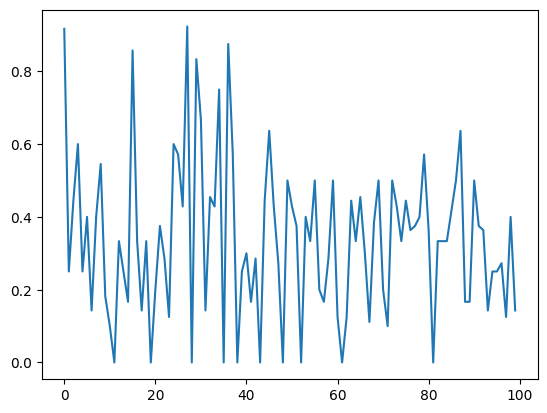

In [23]:
import tempfile

tempfile.tempdir = '/Users/shrugarg/Documents/Test/'

file_name = tempfile.mktemp(prefix='hangman_',suffix='.txt')


with open(file_name, "a") as f:
    score=[]
    num_ep=0
    while num_ep<episodes:
        global config, guessed_letters
        #print('num_ep ====   ',num_ep,file =f)
        target_word = wordlist1[num_ep]
        #print('target_word ====   ',target_word,file =f)
        hangman_word = '_'*len(target_word)
        #print('hangman_word ====   ',hangman_word,file =f)
        config = {'hangman_word':hangman_word,'trials_left':default_trials}
        state = word_to_state(config['hangman_word'])
        #print('state ====   ',state)
        done = False
        guessed_letters =[]
        while not done:
            lost=0
            action_s = policy_net.predict(state.reshape(1,26))
            print('action_s ====   ',action_s,file =f)
            out_action = take_action(action_s,epsilon)
            if not check_count(out_action):
                continue
            next_state_word, reward,done = return_state(hangman_word,target_word,out_action)
            if check_loss(config['trials_left']):
                done = 1
                lost=1
            mem.append([word_to_state(hangman_word), out_action, reward, word_to_state(next_state_word), done])
            if len(mem)>min_size:
                if epsilon > epsilon_min:
                    epsilon *= epsilon_decay
            hangman_word = next_state_word
            train_x, train_y = get_batch(mem,batch_size)
            if train_x is not None:
                policy_net.fit(train_x,train_y,batch_size=batch_size,epochs=1,verbose=0)
            if done:
                score.append(reward)
                print('Episode:{} Score:{}'.format(num_ep+1-lost,reward),file =f)
            
            print('Reward ----',reward)
    #        if check_win(state):action_s] += 1 

    #    if check_loss(config['trials_left']):
    #        print('Game Over')
    #        break

        if num_ep % target_net_update == 0:
            target_net.set_weights(policy_net.get_weights())
            print('Updating target network',file =f)
        #num_ep-=lost
        num_ep+=1
        print(num_ep,file=f)
    #    if num_ep%100 == 0:
    #        print('Saving model')
    #        policy_net.save('hangman_model.h5')
    #        print('Saving score')
    #        np.save('hangman_score.npy',score)
    #        print('Saving cnt')
    #        np.save('hangman_cnt.npy',cnt)
    #        print('Saving guessed_letters')
    #        print('Saving guessed_letters')
    #        np.save('hangman_guessed_letters.npy',guessed_letters)
    #        print('Saving config')
    #        np.save('hangman_config.npy',config)
    #        np.save('hangman_guessed_letters.npy',guessed_letters)
    #        print('Saving wordlist')
    #        np.save('hangman_wordlist.npy',wordlist)
    #        print('Saving target_word')
    #        np.save('hangman_target_word.npy',target_word) 
    #        print('Saving mem')
    #        np.save('hangman_mem.npy',mem)
    #        np.save('hangman_mem.npy',mem)
    #        print('Saving epsilon')
    #        np.save('hangman_epsilon.npy',epsilon)
    #        print('Saving epsilon_min')
    #        np.save('hangman_epsilon_min.npy',epsilon_min)
    #        print('Saving epsilon_decay')
    #        np.save('hangman_epsilon_decay.npy',epsilon_decay)
    #        print('Saving min_size')

plt.plot(score)
plt.show()

In [24]:
sum(score)/len(score)

0.3391941669441669

In [213]:
sum(score)/len(score)

0.23054232804232805

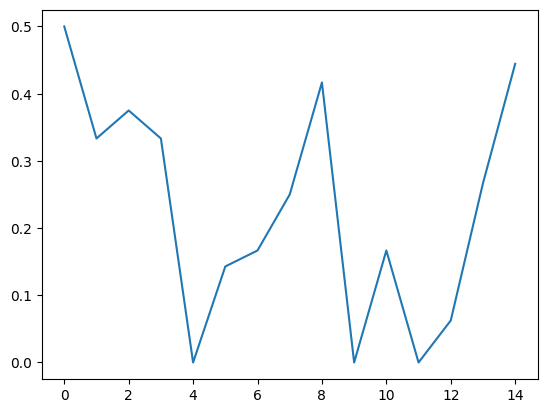

In [214]:
plt.plot(score)
plt.show()

In [46]:
print(policy_net.get_weights())

[array([[ 1.65921241e-01,  4.60329130e-02, -5.35394475e-02, ...,
         9.32924524e-02,  1.89460367e-01, -2.88754199e-02],
       [ 1.27333701e-01, -8.23338926e-02, -3.31488363e-02, ...,
         2.57810075e-02,  2.91317757e-02, -2.00290028e-02],
       [-1.20425202e-01,  1.41737521e-01,  8.32773298e-02, ...,
         1.21331327e-01, -1.68897480e-01, -8.17701966e-02],
       ...,
       [ 2.31675804e-02,  1.02283373e-01, -1.29907906e-01, ...,
         1.23377427e-01,  5.95262647e-03,  1.53681204e-01],
       [-1.55458242e-01, -1.81816816e-02,  1.70136556e-01, ...,
        -1.71975493e-02,  1.23946205e-01,  1.29898295e-01],
       [-1.84382588e-01,  1.38685107e-04, -2.24824846e-02, ...,
         7.94557482e-02, -1.10066541e-01,  9.82306153e-02]], dtype=float32), array([-1.08030613e-03,  4.20303142e-04, -3.13912227e-04, -1.02526881e-03,
       -1.87944519e-04,  2.18340335e-03,  1.75878266e-03,  8.28018074e-07,
       -8.82796521e-05, -3.81287042e-04, -1.31331515e-04, -3.24092165e-04,
 

In [50]:
chr(97+np.argmax(policy_net.predict(word_to_state('b_ll').reshape(1,26))))

1/1 [==============================] - 0s 13ms/step


'l'

In [40]:
print(target_net.get_weights())

[array([[ 1.67349428e-01,  4.55467850e-02, -5.33785373e-02, ...,
         9.48460028e-02,  1.88115746e-01, -2.79846638e-02],
       [ 1.27388373e-01, -8.23946744e-02, -3.31372954e-02, ...,
         2.59876717e-02,  2.87676863e-02, -2.00034790e-02],
       [-1.20429471e-01,  1.41625747e-01,  8.35985690e-02, ...,
         1.21231772e-01, -1.68976948e-01, -8.17499235e-02],
       ...,
       [ 2.31675804e-02,  1.02283373e-01, -1.29907906e-01, ...,
         1.23377427e-01,  5.95262647e-03,  1.53681204e-01],
       [-1.55458242e-01, -1.81816816e-02,  1.70136556e-01, ...,
        -1.71975493e-02,  1.23946205e-01,  1.29898295e-01],
       [-1.84382588e-01,  1.38685107e-04, -2.24824846e-02, ...,
         7.94557482e-02, -1.10066541e-01,  9.82306153e-02]], dtype=float32), array([-3.32953845e-04,  5.61117959e-05, -8.81227388e-05, -3.34519224e-04,
       -5.73430407e-05,  5.91438729e-04,  4.75206529e-04,  2.44167541e-06,
       -7.83812879e-07, -1.18865268e-04, -4.50483894e-05, -1.61191609e-04,
 

In [39]:
config = {'hangman word':state_value,'trials_left':default_trials}
state = np.asarray(config['hangman word'])
state

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [40]:
state_value

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [25]:
class HangmanAPI(object):
    def __init__(self, access_token=None, session=None, timeout=None):
        self.hangman_url = self.determine_hangman_url()
        self.access_token = access_token
        self.session = session or requests.Session()
        self.timeout = timeout
        self.guessed_letters = []
        
        full_dictionary_location = "words_250000_train.txt"
        self.full_dictionary = self.build_dictionary(full_dictionary_location)        
        self.full_dictionary_common_letter_sorted = collections.Counter("".join(self.full_dictionary)).most_common()
        
        self.current_dictionary = []



        
        self.state_value = [[0]*26]
        self.action_prob = [1/26]*26
        self.input_var = 26
        self.output_var = 26
        #self.policy_net = self.nn_model(self.input_var,self.output_var)
        #self.policy_net.load_weights('policy_net_weights.h5')
        #self.target_net = self.nn_model(self.input_var,self.output_var)
        
        
        
    @staticmethod
    def determine_hangman_url():
        links = ['https://trexsim.com', 'https://sg.trexsim.com']

        data = {link: 0 for link in links}

        for link in links:

            requests.get(link)

            for i in range(10):
                s = time.time()
                requests.get(link)
                data[link] = time.time() - s

        link = sorted(data.items(), key=lambda x: x[1])[0][0]
        link += '/trexsim/hangman'
        return link

    def word_to_state(self,word):
        state = np.zeros(26)
        for i in range(len(word)):
            if word[i] in ('_'," "):
                continue
            state[ord(word[i])-97] += 1
        return state

    def nn_model(input_shape,action_space):
        input1 = tf.keras.Input(shape=(input_shape,))
        x1 = tf.keras.layers.Dense(128, activation='relu')(input1)
        x2 = tf.keras.layers.Dense(256, activation='relu')(x1)
        x3 = tf.keras.layers.Dense(512, activation='relu')(x2)
        x4 = tf.keras.layers.Dense(action_space, activation='softmax')(x3)
        model = tf.keras.Model(inputs=input1, outputs=x4)
        sgd=tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)
        model.compile(optimizer=sgd, loss='mse')
        return model
        
    
    def guess(self, word,chk_try=0):
        guess_letter= chr(97+np.argmax(policy_net.predict(self.word_to_state(word).reshape(1,26))))
        if guess_letter not in guessed_letters:
            guessed_letters.append(guess_letter)
            return guess_letter
        else:
            if chk_try ==5:    
                guess_letter = chr(97+random.randint(0,26))
                guessed_letters.append(guess_letter)
                return guess_letter
            else:
                return self.guess(word,chk_try+1)
            

    def guess1(self, word): # word input example: "_ p p _ e "
        ###############################################
        # Replace with your own "guess" function here #
        ###############################################

        # clean the word so that we strip away the space characters
        # replace "_" with "." as "." indicates any character in regular expressions
        clean_word = word[::2].replace("_",".")
        
        # find length of passed word
        len_word = len(clean_word)
        
        # grab current dictionary of possible words from self object, initialize new possible words dictionary to empty
        current_dictionary = self.current_dictionary
        new_dictionary = []
        
        # iterate through all of the words in the old plausible dictionary
        for dict_word in current_dictionary:
            # continue if the word is not of the appropriate length
            if len(dict_word) != len_word:
                continue
                
            # if dictionary word is a possible match then add it to the current dictionary
            if re.match(clean_word,dict_word):
                new_dictionary.append(dict_word)
        
        # overwrite old possible words dictionary with updated version
        self.current_dictionary = new_dictionary
        
        
        # count occurrence of all characters in possible word matches
        full_dict_string = "".join(new_dictionary)
        
        c = collections.Counter(full_dict_string)
        sorted_letter_count = c.most_common()                   
        
        guess_letter = '!'
        
        # return most frequently occurring letter in all possible words that hasn't been guessed yet
        for letter,instance_count in sorted_letter_count:
            if letter not in self.guessed_letters:
                guess_letter = letter
                break
            
        # if no word matches in training dictionary, default back to ordering of full dictionary
        if guess_letter == '!':
            sorted_letter_count = self.full_dictionary_common_letter_sorted
            for letter,instance_count in sorted_letter_count:
                if letter not in self.guessed_letters:
                    guess_letter = letter
                    break            
        
        return guess_letter

    ##########################################################
    # You'll likely not need to modify any of the code below #
    ##########################################################
    
    def build_dictionary(self, dictionary_file_location):
        text_file = open(dictionary_file_location,"r")
        full_dictionary = text_file.read().splitlines()
        text_file.close()
        return full_dictionary
                
    def start_game(self, practice=True, verbose=True):
        # reset guessed letters to empty set and current plausible dictionary to the full dictionary
        self.guessed_letters = []
        self.current_dictionary = self.full_dictionary
                         
        response = self.request("/new_game", {"practice":practice})
        if response.get('status')=="approved":
            game_id = response.get('game_id')
            word = response.get('word')
            tries_remains = response.get('tries_remains')
            if verbose:
                print("Successfully start a new game! Game ID: {0}. # of tries remaining: {1}. Word: {2}.".format(game_id, tries_remains, word))
            while tries_remains>0:
                # get guessed letter from user code
                guess_letter = self.guess(word)
                    
                # append guessed letter to guessed letters field in hangman object
                self.guessed_letters.append(guess_letter)
                if verbose:
                    print("Guessing letter: {0}".format(guess_letter))
                    
                try:    
                    res = self.request("/guess_letter", {"request":"guess_letter", "game_id":game_id, "letter":guess_letter})
                except HangmanAPIError:
                    print('HangmanAPIError exception caught on request.')
                    continue
                except Exception as e:
                    print('Other exception caught on request.')
                    raise e
               
                if verbose:
                    print("Sever response: {0}".format(res))
                status = res.get('status')
                tries_remains = res.get('tries_remains')
                if status=="success":
                    if verbose:
                        print("Successfully finished game: {0}".format(game_id))
                    return True
                elif status=="failed":
                    reason = res.get('reason', '# of tries exceeded!')
                    if verbose:
                        print("Failed game: {0}. Because of: {1}".format(game_id, reason))
                    return False
                elif status=="ongoing":
                    word = res.get('word')
        else:
            if verbose:
                print("Failed to start a new game")
        return status=="success"
        
    def my_status(self):
        return self.request("/my_status", {})
    
    def request(
            self, path, args=None, post_args=None, method=None):
        if args is None:
            args = dict()
        if post_args is not None:
            method = "POST"

        # Add `access_token` to post_args or args if it has not already been
        # included.
        if self.access_token:
            # If post_args exists, we assume that args either does not exists
            # or it does not need `access_token`.
            if post_args and "access_token" not in post_args:
                post_args["access_token"] = self.access_token
            elif "access_token" not in args:
                args["access_token"] = self.access_token

        time.sleep(0.2)

        num_retry, time_sleep = 50, 2
        for it in range(num_retry):
            try:
                response = self.session.request(
                    method or "GET",
                    self.hangman_url + path,
                    timeout=self.timeout,
                    params=args,
                    data=post_args,
                    verify=False
                )
                break
            except requests.HTTPError as e:
                response = json.loads(e.read())
                raise HangmanAPIError(response)
            except requests.exceptions.SSLError as e:
                if it + 1 == num_retry:
                    raise
                time.sleep(time_sleep)

        headers = response.headers
        if 'json' in headers['content-type']:
            result = response.json()
        elif "access_token" in parse_qs(response.text):
            query_str = parse_qs(response.text)
            if "access_token" in query_str:
                result = {"access_token": query_str["access_token"][0]}
                if "expires" in query_str:
                    result["expires"] = query_str["expires"][0]
            else:
                raise HangmanAPIError(response.json())
        else:
            raise HangmanAPIError('Maintype was not text, or querystring')

        if result and isinstance(result, dict) and result.get("error"):
            raise HangmanAPIError(result)
        return result
    
class HangmanAPIError(Exception):
    def __init__(self, result):
        self.result = result
        self.code = None
        try:
            self.type = result["error_code"]
        except (KeyError, TypeError):
            self.type = ""

        try:
            self.message = result["error_description"]
        except (KeyError, TypeError):
            try:
                self.message = result["error"]["message"]
                self.code = result["error"].get("code")
                if not self.type:
                    self.type = result["error"].get("type", "")
            except (KeyError, TypeError):
                try:
                    self.message = result["error_msg"]
                except (KeyError, TypeError):
                    self.message = result

        Exception.__init__(self, self.message)

In [3]:
pip install requests

  Obtaining dependency information for requests from https://files.pythonhosted.org/packages/70/8e/0e2d847013cb52cd35b38c009bb167a1a26b2ce6cd6965bf26b47bc0bf44/requests-2.31.0-py3-none-any.whl.metadata
  Obtaining dependency information for charset-normalizer<4,>=2 from https://files.pythonhosted.org/packages/91/e6/8fa919fc84a106e9b04109de62bdf8526899e2754a64da66e1cd50ac1faa/charset_normalizer-3.2.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 2.4 MB/s eta 0:00:00
  Obtaining dependency information for urllib3<3,>=1.21.1 from https://files.pythonhosted.org/packages/9b/81/62fd61001fa4b9d0df6e31d47ff49cfa9de4af03adecf339c7bc30656b37/urllib3-2.0.4-py3-none-any.whl.metadata
  Obtaining dependency information for certifi>=2017.4.17 from https://files.pythonhosted.org/packages/4c/dd/2234eab22353ffc7d94e8d13177aaa050113286e93e7b40eae01fbf7c3d9/certifi-2023.7.22-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/6

# API Usage Examples

## To start a new game:
1. Make sure you have implemented your own "guess" method.
2. Use the access_token that we sent you to create your HangmanAPI object. 
3. Start a game by calling "start_game" method.
4. If you wish to test your function without being recorded, set "practice" parameter to 1.
5. Note: You have a rate limit of 20 new games per minute. DO NOT start more than 20 new games within one minute.

In [26]:
api = HangmanAPI(access_token="d59e0b1b552fd8b20ed9afc31a149d", timeout=2000)


In [55]:
api.full_dictionary

['aaa',
 'aaaaaa',
 'aaas',
 'aachen',
 'aaee',
 'aag',
 'aahed',
 'aahs',
 'aal',
 'aalesund',
 'aaliis',
 'aalst',
 'aam',
 'aandahl',
 'aao',
 'aapss',
 'aar',
 'aarau',
 'aardvark',
 'aardwolf',
 'aaren',
 'aargh',
 'aarika',
 'aaronic',
 'aaronite',
 'aaronsburg',
 'aarp',
 'aarrghh',
 'aas',
 'aasvogels',
 'aaup',
 'aavso',
 'aba',
 'ababdeh',
 'abac',
 'abacas',
 'abacaxi',
 'abaci',
 'abacination',
 'abaciscus',
 'aback',
 'abaco',
 'abacterial',
 'abactinally',
 'abactor',
 'abaculus',
 'abacuses',
 'abada',
 'abaddon',
 'abadengo',
 'abadite',
 'abaft',
 'abagail',
 'abailard',
 'abaised',
 'abaisse',
 'abaka',
 'abakas',
 'abalation',
 'abalienated',
 'abalienation',
 'abalones',
 'abamp',
 'abamperes',
 'abana',
 'abandon',
 'abandoned',
 'abandonee',
 'abandoners',
 'abandonment',
 'abandons',
 'abanet',
 'abanic',
 'abantes',
 'abaptiston',
 'abarambo',
 'abaris',
 'abarticular',
 'abas',
 'abased',
 'abasedness',
 'abasements',
 'abasers',
 'abasgi',
 'abashed',
 'abashe

## Playing practice games:
You can use the command below to play up to 100,000 practice games.

In [27]:
api.start_game(practice=1,verbose=True)
[total_practice_runs,total_recorded_runs,total_recorded_successes,total_practice_successes] = api.my_status() # Get my game stats: (# of tries, # of wins)
practice_success_rate = total_practice_successes / total_practice_runs
print('run %d practice games out of an allotted 100,000. practice success rate so far = %.3f' % (total_practice_runs, practice_success_rate))


Successfully start a new game! Game ID: d8c011d81c32. # of tries remaining: 6. Word: _ _ _ _ _ _ .
1/1 [==============================] - 0s 10ms/step
Guessing letter: u
Sever response: {'game_id': 'd8c011d81c32', 'status': 'ongoing', 'tries_remains': 5, 'word': '_ _ _ _ _ _ '}
1/1 [==============================] - 0s 9ms/step
Guessing letter: r
Sever response: {'game_id': 'd8c011d81c32', 'status': 'ongoing', 'tries_remains': 4, 'word': '_ _ _ _ _ _ '}
1/1 [==============================] - 0s 10ms/step
Guessing letter: g
Sever response: {'game_id': 'd8c011d81c32', 'status': 'ongoing', 'tries_remains': 3, 'word': '_ _ _ _ _ _ '}
1/1 [==============================] - 0s 10ms/step
Guessing letter: y
Sever response: {'game_id': 'd8c011d81c32', 'status': 'ongoing', 'tries_remains': 2, 'word': '_ _ _ _ _ _ '}
1/1 [==============================] - 0s 9ms/step
Guessing letter: m
Sever response: {'game_id': 'd8c011d81c32', 'status': 'ongoing', 'tries_remains': 1, 'word': '_ _ _ _ _ _ '}
1/1

## Playing recorded games:
Please finalize your code prior to running the cell below. Once this code executes once successfully your submission will be finalized. Our system will not allow you to rerun any additional games.

Please note that it is expected that after you successfully run this block of code that subsequent runs will result in the error message "Your account has been deactivated".

Once you've run this section of the code your submission is complete. Please send us your source code via email.

In [ ]:
for i in range(1000):
    print('Playing ', i, ' th game')
    # Uncomment the following line to execute your final runs. Do not do this until you are satisfied with your submission
    #api.start_game(practice=0,verbose=False)
    
    # DO NOT REMOVE as otherwise the server may lock you out for too high frequency of requests
    time.sleep(0.5)

## To check your game statistics
1. Simply use "my_status" method.
2. Returns your total number of games, and number of wins.

In [ ]:
[total_practice_runs,total_recorded_runs,total_recorded_successes,total_practice_successes] = api.my_status() # Get my game stats: (# of tries, # of wins)
success_rate = total_recorded_successes/total_recorded_runs
print('overall success rate = %.3f' % success_rate)